# Classification & Detection of Singapore Road Traffic Signs: <br>[Part 1] Classification via Tensorflow Keras API

## Background

In the global automotive industry today, self-driving cars, also known as autonomous vehicles, have been one of the key innovations that is brought about by accelerating adoption of artificial intelligence and robotics. An [article](https://apnews.com/press-release/Wired%2520Release/79c308d2e72d77a9a755be454b3a278a) by The Associated Press wrote that according to Allied Market Research, the global autonomous vehicle market is estimated to garner $556.67 billion by 2026 with a compound annual growth rate of 39.4% during period 2019–2026. Furthermore, [Consultancy Asia](https://www.consultancy.asia/news/3382/singapore-is-the-globes-top-country-for-autonomous-driving) wrote that KPMG released a benchmark report in mid-2020, naming Singapore as the top country in the world in terms of development of self-driving cars, as reflected in the government's policy-making and legislation efforts to encourage use of autonomous vehicles.

Not only is an AV expected to transport people and goods efficiently and safely from point-to-point, it must also comply with existing road regulations as what is expected of human drivers. One of the primary indicators of road regulations would be traffic signs. In Singapore, they range from the green directional signs that tell drivers about upcoming expressway exits, to warning signs that indicate potential elements of danger ahead, such as pedestrian crossings. While technologies like LIDAR and GPS provide spartial input to guide road positioning and collision avoidance, computer vision adds on to the array of sensors in terms of visual perception of the environment, which could include the detection of road traffic signs. It is the combination of these technologies, plus many more that have yet to come to implementation, that would enable autonomous vehicles to achieve and surpass the level of human perception required to bring a vehicle to the intended destination in a safe manner.

## Problem Statement

This project is focused on the development both a classification model and an object-detection model to recognise road traffic signs in Singapore. While there are established datasets on traffic signs for countries like Germany and the U.S., there has not been one that is readily available and applicable to the signs found in Singapore. Hence there is a need to build a dataset of local traffic signs as a start, which would be sufficient to facilitate analysis, as well as aid the construction of classification and detection models that could recognise, as well as locate 1 or multiple traffic signs on a given image.

## Data Collection

Traffic Sign Classification/Detection is certainly not a new domain, and there are many established datasets available on the web, such as the *Challenging Unreal and Real Environments for Traffic Sign Recognition* ([CURE-TSR](https://github.com/olivesgatech/CURE-TSR)) by [*OLIVES Lab*](https://ghassanalregib.info/) of Georgia Institute of Technology, and German Traffic Sign Recognition Benchmark ([GTSRB](https://benchmark.ini.rub.de/)) by the [*Real-Time Computer Vision research group*](https://www.ini.rub.de/research/groups/rtcv/) of Ruhr-Universität Bochum. 

However this project aims to carry out classification and detection of road traffic signs in Singapore, and in the absence of any known publicly (and readily) available dataset at the time of this idea's conception, there lies a need to build up this dataset. One such avenue is through Google Image search, but search terms like *'singapore traffic signs'* yields mostly vector graphics, and certainly not enough of real-world scenes of roads in Singapore. The other alternative was to turn to dashboard camera (aka dash-cam) footages. In Singapore, nearly every vehicle has an interior dash-cam that is typically angled towards the front of the vehicle. Footages captured on such dash-cams are usually to facilitate insurance claims and/or police investigations in the unlikely event of an automobile accident, and normally erased after a period of time so as to conserve onboard storage space on the dash-cam. There is a likelihood that such footages get uploaded to the Internet for purpose of a broader sense of media sharing (e.g. road tours within a city, etc).

A quick search on the Internet reveals that people do upload such dash-cam footages for public viewing, hence such footages become a viable source of imagery data. The data-collection process then proceeds as follows:

<img src='./Images/classification_data_collection_process.png' />

Observations:

- Dash-cam videos in 1080p resolution (or better) tend to yield images of best possible quality. Videos obtained are typically in *mp4* or *webm* formats.


- Nearly 80 classes of traffic signs captured, but many classes have low yield (10-20 images, due to rarity of occurrence). Final traffic-sign image is in *jpg* format.

The following code segment shows how a helper function can be used to extract frames from a video file:

### Import all necessary libraries

In [1]:
import os
import numpy as np
import random as rdm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image, ImageStat
import seaborn as sns
from IPython.display import HTML
import matplotlib.cm

### Define function to capture video frames from a video file

In [2]:
import cv2
# helper function to capture frames at a specified interval
def capture_frames(video_path, frames_folder_path, yield_modulo):
    print('Start capture_frames')
    if not os.path.isfile(video_path):
        print('Video file does not exist')
        return 0
    else:
        print('Video file found on path: {}'.format(video_path))
    
    
    if not os.path.exists(frames_folder_path):
        print('Creating frames folder: {}'.format(frames_folder_path))
        os.makedirs(frames_folder_path)
    else:
        print('Frames folder already exist, skipping folder creation')
    
    i=0
    cap = cv2.VideoCapture(video_path)
    
    while(cap.isOpened()):
        ret, frame = cap.read()

        if i % yield_modulo == 0 :
            cv2.imwrite(frames_folder_path+str(i).zfill(6)+'.jpg', frame)

        if ret == False:
            break
        if i % 5000 == 0:
            print('Frame #{}'.format(i))
        i+=1

    cap.release()
    cv2.destroyAllWindows()
    
    return i

### Declare path to source video and destination folder for frames

In [5]:
path_to_video = 'K:/video_43.mp4'
path_to_frames_subfolder = 'K:/video_43_webm/'
frame_interval = 5

### Execute frame capture

In [6]:
#result = capture_frames(path_to_video, path_to_frames_subfolder, frame_interval)
#print('Frames capture in {}: {}'.format(path_to_frames_subfolder, result))

## Exploratory Data Analysis

### Define locations of `train` and `test` datasets

In [2]:
#base_dir = '../'
base_dir = '..\\'
base_img_folder = 'SINGAPORE_TRAFFIC_SIGNS_CLASSIFICATION'
train_img_folder = 'TRAIN'
test_img_folder = 'TEST'

dataset_dir = os.path.join(base_dir, base_img_folder)
train_dir = os.path.join(dataset_dir, train_img_folder)
test_dir = os.path.join(dataset_dir, test_img_folder)

print('Directory of train dataset: {}'.format(train_dir))
print('\nDirectory of test dataset: {}'.format(test_dir))

Directory of train dataset: ..\SINGAPORE_TRAFFIC_SIGNS_CLASSIFICATION\TRAIN

Directory of test dataset: ..\SINGAPORE_TRAFFIC_SIGNS_CLASSIFICATION\TEST


### Check number of classes in `train` dataset

In [3]:
class_list = os.listdir(train_dir)

class_list = [item for item in class_list if item != '.DS_Store']

print('Total Number of traffic sign classes: {}'.format(len(class_list)))
print(class_list)

Total Number of traffic sign classes: 32
['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '4', '5', '6', '7', '8', '9']


### Read in labels manifest and inspect 5 samples

In [4]:
label_manifest = pd.read_csv(os.path.join(base_dir, base_img_folder, 'labels.txt'))
label_manifest.loc[:,'INDEX'] = label_manifest.loc[:,'INDEX'].astype(str)
label_manifest.set_index('INDEX', inplace=True)
label_manifest.sample(10)

,DESCRIPTION
INDEX,
29,WARNING_SLOW_DOWN
26,PROHIBITORY_NO_LEFT_TURN
9,MANDATORY_STOP
27,INFO_ONE_WAY_RIGHT
28,INFO_ONE_WAY_LEFT
20,INFO_START_OF_EXP_WAY
19,WARNING_CURVE_LEFT_ALIGNMENT_MARKER
18,WARNING_RESTRICTED_ZONE_AHEAD
22,PROHIBITORY_NO_VEH_OVER_HEIGHT_4.5


A total of 32 classes of traffic signs are present in this classification dataset. They are contained in 32 separate folders, each numerically named and corresponds to the index found in the label manifest. As shown in above dataframe, each index in a record is associated with the descriptive name of the traffic sign. Official road sign names can be reference from this [Wikipedia Commons page](https://commons.wikimedia.org/wiki/User:Fry1989/Gallery/Road_Signs/Singapore).

### Load `train` dataset

#### Define helper function to ingest images

In [5]:
def get_brightness(img_fn):
   im = Image.open(img_fn).convert('L') # convert to grayscale
   stat = ImageStat.Stat(im)
   return stat.mean[0]

def load_dataset(target_dir):
    img_list = [] # numpy array representation of image data
    label_list = [] # label corresponding to image

    traffic_signs_dict = { 
        'img_index': [],
        'label': [], # numerical label given to image
        'description': [], # essentially the name of the traffic sign
        'img_filename' : [], # filename given to this image
        'img_height': [], # height of image in pixels
        'img_width': [], # width of image in pixels
        'img_channels': [], # number of colour channels
        'img_aspect_ratio': [], # aspect ratio of image, taking height divided by width
        'img_brightness': []
    }

    #class_list_v2 = ['21']
    img_counter = 0

    for index_str in class_list:
        current_traffic_sign_dir = os.path.join(target_dir, index_str)
        if os.path.isdir(current_traffic_sign_dir):
            traffic_signs_img_list = os.listdir(current_traffic_sign_dir)
            for img_fn in traffic_signs_img_list:
                if img_fn.endswith('.jpg'):
                    current_traffic_sign = np.asarray(Image.open(os.path.join(current_traffic_sign_dir, img_fn)))
                    height, width, channels = current_traffic_sign.shape
                    img_list.append(current_traffic_sign)
                    label_list.append(index_str)
                    traffic_signs_dict['img_index'].append(img_counter)
                    traffic_signs_dict['img_filename'].append(os.path.join(current_traffic_sign_dir, img_fn))
                    traffic_signs_dict['img_height'].append(height)
                    traffic_signs_dict['img_width'].append(width)
                    traffic_signs_dict['img_channels'].append(channels)
                    traffic_signs_dict['img_aspect_ratio'].append(float(height) / float(width))
                    traffic_signs_dict['img_brightness'].append(get_brightness(os.path.join(current_traffic_sign_dir, img_fn)))
                    traffic_signs_dict['label'].append(int(index_str))
                    traffic_signs_dict['description'].append(label_manifest.loc[index_str,'DESCRIPTION'])

                    img_counter += 1
                #else:
                #    print('Skipping {}'.format(img_fn)) # print out skipped files for investigation
            print('{} images found for label [{}]: {}'.format(len(traffic_signs_img_list), index_str, label_manifest.loc[index_str,'DESCRIPTION']))
        else:
            print('Skipping {}'.format(current_traffic_sign_dir))
    
    result_df = pd.DataFrame(data=traffic_signs_dict).sort_values(by='label').reset_index(drop=True)
    return img_list, label_list, result_df

#### Read in images from `train` dataset

In [6]:
ts_img_list, ts_label_list, traffic_signs_df = load_dataset(train_dir)
train_arr = np.array(ts_img_list)
label_arr = np.array(ts_label_list)

print('\nTotal number of images in train dataset: {}'.format(len(train_arr)))
print('Total number of labels for train dataset: {}'.format(len(label_arr)))

59 images found for label [0]: INFO_END_OF_EXP_WAY
213 images found for label [1]: PROHIBITORY_NO_JAYWALKING
77 images found for label [10]: PROHIBITORY_SPD_LIMIT_50
65 images found for label [11]: WARNING_CURVE_RIGHT_ALIGNMENT_MARKER
171 images found for label [12]: INFO_ZEBRA_CROSSING
76 images found for label [13]: INFO_RAIN_SHELTER
121 images found for label [14]: PROHIBITORY_NO_ENTRY
89 images found for label [15]: MANDATORY_KEEP_LEFT
105 images found for label [16]: INFO_PARKING_AREA_FOR_MOTORCARS
147 images found for label [17]: INFO_PEDESTRIAN_USE_CROSSING
52 images found for label [18]: WARNING_RESTRICTED_ZONE_AHEAD
48 images found for label [19]: WARNING_CURVE_LEFT_ALIGNMENT_MARKER
36 images found for label [2]: INFO_TP_CAMERA_ZONE
54 images found for label [20]: INFO_START_OF_EXP_WAY
74 images found for label [21]: MANDATORY_GIVE_WAY
148 images found for label [22]: PROHIBITORY_NO_VEH_OVER_HEIGHT_4.5
26 images found for label [23]: PROHIBITORY_SPD_LIMIT_40
227 images found f

The `train` folder in *SINGAPORE_TRAFFIC_SIGNS_CLASSIFICATION* contains 32 sub-folders, each corresponding to class of traffic sign, and totaling to 2895 image files.

### Inspection of images

Attempt to preview 10 random images from `train` dataset

In [18]:
sample_traffic_signs = traffic_signs_df.sample(n=15)
sample_traffic_signs

,img_index,label,description,img_filename,img_height,img_width,img_channels,img_aspect_ratio,img_brightness
382,2173,3,PROHIBITORY_SPD_LIMIT_90,..\SINGAPORE_TRAFFIC_SIGNS_CLASSIFICATION\TRAI...,84,84,3,1.0,134.957341
2757,2079,29,WARNING_SLOW_DOWN,..\SINGAPORE_TRAFFIC_SIGNS_CLASSIFICATION\TRAI...,89,89,3,1.0,82.499432
1782,1021,17,INFO_PEDESTRIAN_USE_CROSSING,..\SINGAPORE_TRAFFIC_SIGNS_CLASSIFICATION\TRAI...,176,176,3,1.0,102.682884
2628,2003,28,INFO_ONE_WAY_LEFT,..\SINGAPORE_TRAFFIC_SIGNS_CLASSIFICATION\TRAI...,249,249,3,1.0,142.741649
970,312,10,PROHIBITORY_SPD_LIMIT_50,..\SINGAPORE_TRAFFIC_SIGNS_CLASSIFICATION\TRAI...,129,129,3,1.0,121.397332
1324,749,14,PROHIBITORY_NO_ENTRY,..\SINGAPORE_TRAFFIC_SIGNS_CLASSIFICATION\TRAI...,282,282,3,1.0,105.604949
1134,563,12,INFO_ZEBRA_CROSSING,..\SINGAPORE_TRAFFIC_SIGNS_CLASSIFICATION\TRAI...,105,105,3,1.0,108.357551
2678,2096,29,WARNING_SLOW_DOWN,..\SINGAPORE_TRAFFIC_SIGNS_CLASSIFICATION\TRAI...,175,175,3,1.0,80.145176
2821,2302,30,WARNING_MERGE,..\SINGAPORE_TRAFFIC_SIGNS_CLASSIFICATION\TRAI...,90,90,3,1.0,140.323827
1451,837,15,MANDATORY_KEEP_LEFT,..\SINGAPORE_TRAFFIC_SIGNS_CLASSIFICATION\TRAI...,232,232,3,1.0,111.935345


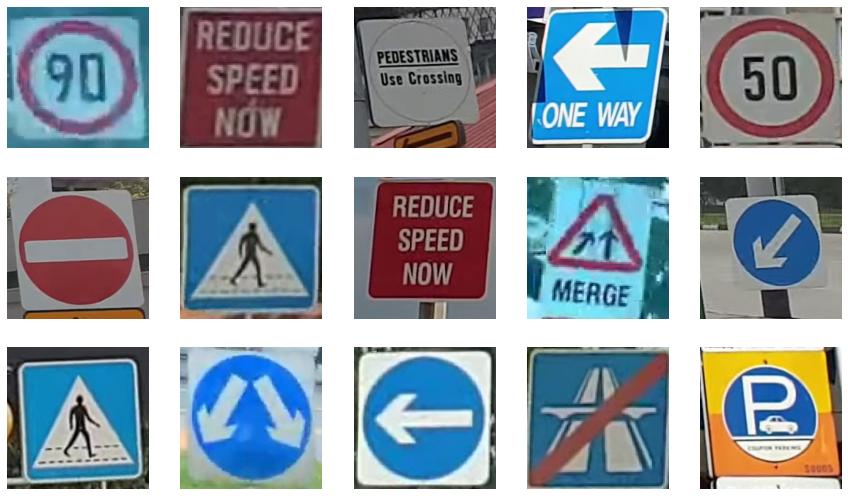

In [19]:
ncols = 5
nrows = 4

fig = plt.gcf()
fig.set_size_inches(ncols * 3, nrows * 3)

for i, traffic_sign_index in enumerate(sample_traffic_signs.loc[:,'img_index']):
    sp = plt.subplot(nrows, ncols, i+1)
    sp.axis('Off')
    plt.imshow(train_arr[traffic_sign_index])
    
plt.show()

The above sub-plots shows 10 traffic sign images randomly sampled from the `train` dataset. As earlier mentioned in step-4 of the data-collection process, a tight crop performed most of the time for each traffic sign. A constant aspect ratio of 1.0 was used in the cropping process, hence all images are in square format, regardless of the shape of the actual traffic sign. As such, rectangular traffic signs, such as *INFO_TP_CAMERA_ZONE*, would show a background that is behind the actual sign.

### Count images per class

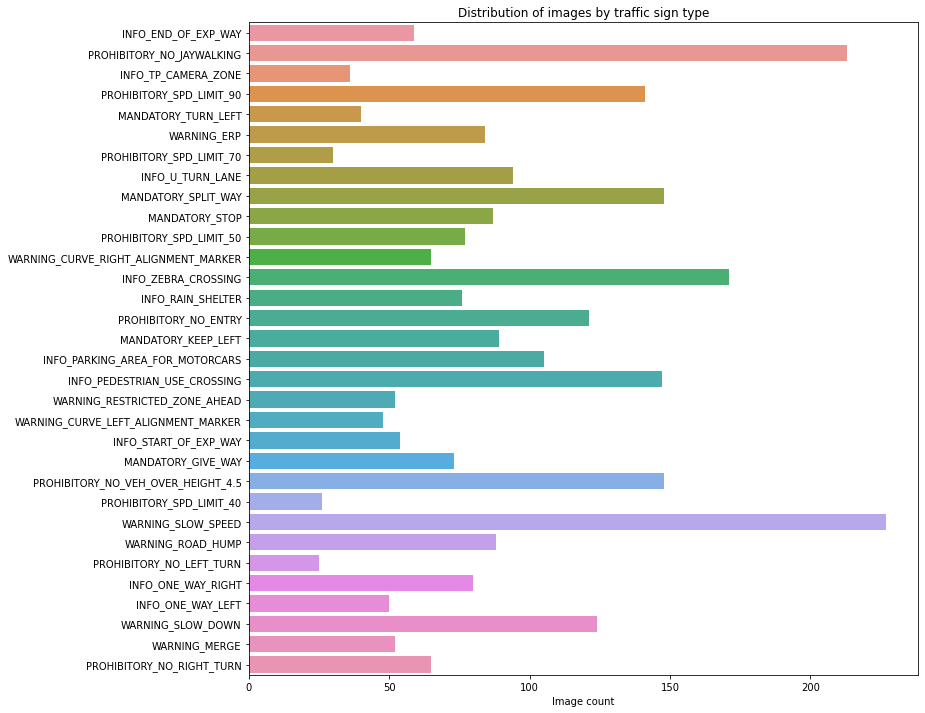

In [10]:
plt.figure(figsize=(12,12))
sns.countplot(data=traffic_signs_df, y='description')
plt.title('Distribution of images by traffic sign type')
plt.ylabel('')
plt.xlabel('Image count')
plt.show()

Above countplot indicates an unequal distribution of image classes. *PROHIBITORY_NO_JAYWALKING*, *INFO_ZEBRA_CROSSING* and *WARNING_SLOW_SPEED* are the only classes so far that exceed 150 images. Classes like *PROHIBITORY_SPD_LIMIT_40* and *PROHIBITORY_NO_LEFT_TURN* have under 25 images, due to their rarity of occurrence in the source videos.

### Investigate dimension variance

#### Distribution of image widths

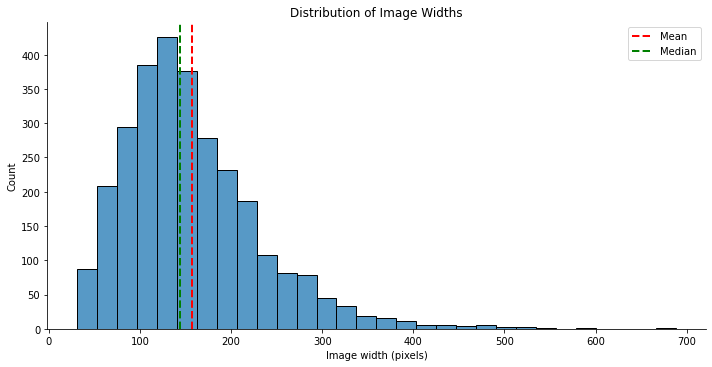

In [20]:
#plt.figure(figsize=(12, 12))
sns.displot(data=traffic_signs_df, x='img_width', height=5, aspect=2.0, bins=30)
plt.axvline(traffic_signs_df.loc[:,'img_width'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(traffic_signs_df.loc[:,'img_width'].median(), color='green', linestyle='dashed', linewidth=2, label='Median')
plt.title('Distribution of Image Widths')
plt.xlabel('Image width (pixels)')
plt.legend()
plt.show()

Right skew observed for distribution of image widths, indicating a small proportion of traffic sign images with large width, up to nearly 700 pixels. Most images measure around 120-140 pixels as indicated by the mode, while mean width is approximately 157 pixels.

#### Inspect image with largest width

In [21]:
largest_img = traffic_signs_df.loc[traffic_signs_df.loc[:,'img_width']==traffic_signs_df.loc[:,'img_width'].max(),:]
largest_img

,img_index,label,description,img_filename,img_height,img_width,img_channels,img_aspect_ratio,img_brightness
681,2619,7,INFO_U_TURN_LANE,..\SINGAPORE_TRAFFIC_SIGNS_CLASSIFICATION\TRAI...,688,688,3,1.0,136.437151


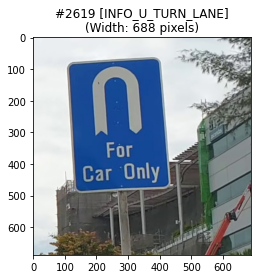

In [24]:
plt.imshow(train_arr[largest_img.iloc[0]['img_index']])
plt.title('#{} [{}]\n(Width: {} pixels)'.format(
    largest_img.iloc[0]['img_index'], 
    largest_img.iloc[0]['description'],
    largest_img.iloc[0]['img_width']
))
plt.show()

A not-so-common U-Turn sign found in the vicinity of Changi Business Park.

#### Inspect image with smallest width

In [26]:
smallest_img = traffic_signs_df.loc[traffic_signs_df.loc[:,'img_width']==traffic_signs_df.loc[:,'img_width'].min(),:]
smallest_img

,img_index,label,description,img_filename,img_height,img_width,img_channels,img_aspect_ratio,img_brightness
1414,690,14,PROHIBITORY_NO_ENTRY,..\SINGAPORE_TRAFFIC_SIGNS_CLASSIFICATION\TRAI...,31,31,3,1.0,81.17898


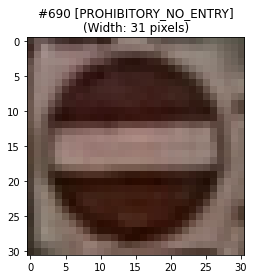

In [27]:
plt.imshow(train_arr[smallest_img.iloc[0]['img_index']])
plt.title('#{} [{}]\n(Width: {} pixels)'.format(
    smallest_img.iloc[0]['img_index'], 
    smallest_img.iloc[0]['description'],
    smallest_img.iloc[0]['img_width']
))
plt.show()

May need to review the minimum acceptable width, as some other traffic signs may contain a lot of details (e.g. Traffic Police Camera Zone) that may be lost if model is taking inputs that are scaled to the smallest available width.

### Investigate brightness variance

Brightness is calculated by the pixel value of the image when converted to grayscale. 255.0 would indicate white (brightest), while 0.0 will indicate black (darkest).

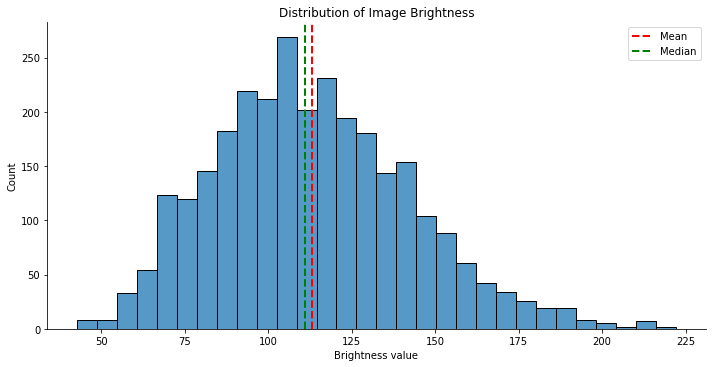

In [28]:
#plt.figure(figsize=(12, 12))
sns.displot(data=traffic_signs_df, x='img_brightness', height=5, aspect=2.0, bins=30)
plt.axvline(traffic_signs_df.loc[:,'img_brightness'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(traffic_signs_df.loc[:,'img_brightness'].median(), color='green', linestyle='dashed', linewidth=2, label='Median')
plt.title('Distribution of Image Brightness')
plt.xlabel('Brightness value')
plt.legend()
plt.show()

Distribution has a slight right skew, indicating a small proportion of images that are very bright. However, if average brightness is taken to be at value of 127.5 (halfway mark between 0 and 255), then the above plot indicates that the mean, median and mode values (denoted by tallest bin to the left of the green median line) all fall below the average brightness value. One possible reason is that dash-cams typically have exposure compensation feature that adjusts the exposure of a captured video frame is adjusted to an appropriate level that does not over- or under-expose the footage. Hence, in a typical daylight scene where the skyline contributes a large amount of light, the dash-cam would compensate by reducing the exposure on the captured footage. This would lower the brightness of the overall scene which include ground objects (including traffic signs), thus making them appear less bright.

Next, we take a look at the brightest and dimmest images found within the `train` dataset:

#### Inspect brightest image

In [29]:
brightest_img = traffic_signs_df.loc[ \
    traffic_signs_df.loc[:,'img_brightness'] == traffic_signs_df.loc[:,'img_brightness'].max(), \
    : ]
brightest_img

,img_index,label,description,img_filename,img_height,img_width,img_channels,img_aspect_ratio,img_brightness
1796,1123,18,WARNING_RESTRICTED_ZONE_AHEAD,..\SINGAPORE_TRAFFIC_SIGNS_CLASSIFICATION\TRAI...,36,48,3,0.75,222.045139


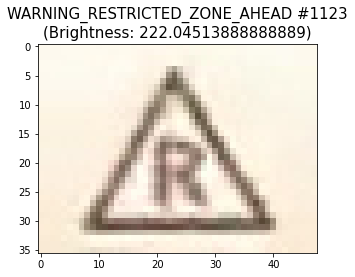

In [30]:
plt.figure(figsize=(5, 5))
plt.imshow(train_arr[brightest_img.iloc[0]['img_index']])
plt.title('{} #{}\n(Brightness: {})'.format(
    brightest_img.iloc[0]['description'], 
    brightest_img.iloc[0]['img_index'], 
    brightest_img.iloc[0]['img_brightness']), fontsize=15)
plt.show()

Brightest image appears to be the *WARNING_RESTRICTED_ZONE_AHEAD* sign, which usually appears on an Electronic Road Pricing (ERP) gantry, on a white background which logically makes the overall image a bright and contrasting one.

#### Inspect darkest image

In [32]:
darkest_img = traffic_signs_df.loc[ \
    traffic_signs_df.loc[:,'img_brightness'] == traffic_signs_df.loc[:,'img_brightness'].min(), \
    : ]
darkest_img

,img_index,label,description,img_filename,img_height,img_width,img_channels,img_aspect_ratio,img_brightness
1053,362,11,WARNING_CURVE_RIGHT_ALIGNMENT_MARKER,..\SINGAPORE_TRAFFIC_SIGNS_CLASSIFICATION\TRAI...,60,60,3,1.0,42.8525


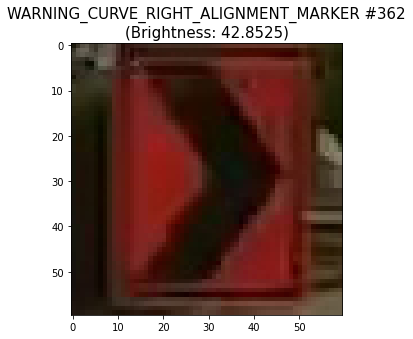

In [33]:
plt.figure(figsize=(5, 5))
plt.imshow(train_arr[darkest_img.iloc[0]['img_index']])
plt.title('{} #{}\n(Brightness: {})'.format(
    darkest_img.iloc[0]['description'], 
    darkest_img.iloc[0]['img_index'], 
    darkest_img.iloc[0]['img_brightness']), fontsize=15)
plt.show()

Dimmest image is a *WARNING_CURVE_RIGHT_ALIGNMENT_MARKER* sign, which are commonly found at road segments that bend in a curve shape towards the right.

Variance in brightness also arise from real-world conditions where objects are located in varying degrees of exposure too.

<img src='Images/brightness_variance_example.jpg'>

In the above frame, there are 2 *WARNING_TRAFFIC_SIGNALS_IN_USE_AHEAD* signs on the left and right sides. The left sign (circled in red) is in full exposure to sunlight, while the right sign (circled in blue) is located in shade. When cropped out, both signs would exhibit different brightness levels.

### Investigate perspective variance

Traffic sign images do not always appear as regular squares/rectangles. Several factors can lead to them appearing in a distorted perspective at varying degrees.

<img src='./Images/perspective distortion example 0.jpg' />

The above frame shows a *WARNING_OTHER_DANGERS* sign along Beatty Road. It is located in centre of frame, with the traffic sign facing the camera directly. The sign looks like an upright quadrilateral, except when viewed with the red guideline, the slight tilt of the sign-pole becomes more apparent. While the blue box outlines the signs actual shape, the green box shows how an upright quadrilateral would appear (hence not totally in line with the blue box), thus indicating that the traffic sign is at least slightly rotated.

<img src='./Images/perspective distortion example 1.jpg' />

Perspective distortion becomes more pronounced when traffic signs not facing the camera directly. The *PROHIBITORY_NO_JAYWALKING* sign here is facing towards the left side of the camera (nearly 45 degree angle), hence the sign appears like a rhombus (blue box outlining the sign), as opposed to an upright quadrilateral (green box).

Perspective distortion might also be induced by the media capturing device. In this case, the lens curvature of the dash-cam might be introducing artifacts such as lens distortion:

<img src='./Images/barrel distortion.jpg' />

One example of lens distortion is that straight objects at the sides of a frame (e.g. a building such as a shophouse) appears to be curved in towards the centre of the frame, as indicated by the red line. The blue vertical line links up with the lower end of the red line to show the extent of the curvature.

<img src='./Images/barrel distortion 2.jpg' />

Yet another example of lens distortion which has caused the ERP gantry at the top of the frame to appear curved, as indicated by the red line. The blue straight line links up the 2 corners of the ERP gantry to show the extent of the curvature.

Such lens distortion is often present in wide-angle lens that have greater field-of-view.

As such, there are a mixture of factors that contribute to the perspective variance in traffic signs.

### Investigate other miscellaneous forms of variance

Other forms of variance do appear in images too, albeit being less common:

<img src='./Images/other_3_images.png' />

Traffic signs may be faded, just like the *PROHIBITORY_NO_JAYWALKING* on the left. Some are obscured by other environmental elements, like the *WARNING_ROAD_HUMP* and *WARNING_SLOW_SPEED* signs in the middle. Last but not least, their appearance might be altered by dirt or other things, such as the moss-covered *PROHIBITORY_SPEED_LIMIT_70* sign on the right.

Apart from factors affecting traffic signs in a localised manner, we have several other forms of variance that affects the entire image frame, such as colour cast:

<img src='./Images/colour_cast_1.jpg?0' />

In above, the tint on the windscreen has caused the dash-cam footage to have a blue/green hue.

<img src='./Images/colour_cast_2.jpg?0' />

Presence of raindrops would introduce more noise to the frame, on top of the blue-ish hue.

<img src='./Images/colour_cast_3.jpg?0' />

Time of day would also influence the kind of light being cast on objects on the road (such as the yellow street lamps that illuminate the expressways at night), hence causing the entire frame to look different from a colour perspective.

### Investigate the average image of every class

At this point, we know that the traffic sign images could potentially exhibit many forms of variance, such as brightness, perspective or other miscellaneous factors that distort its appearance. Still, we can merge all the images up by their classes in the `train` dataset to see what the average image looks like for each of them.

In mathematical terms, it means taking the mean value of each pixel, for all 3 colour channels, across all observations. Furthermore, because our images are of different dimensions, they all have to be resized to take a common width and height before the averaging computation can be carried out.

#### Define helper function to resize and perform average computation on a given list of images

In [24]:
def generate_average_image(image_array_list):
    # get total number of images present in list
    img_count = len(image_array_list)
    
    # initialize 3-channel array of floats that would hold data for average image
    arr=np.zeros((50,50,3),np.float) 
    
    # iterate through every image in the image-list
    for img in image_array_list: 
        # get back PIL image from the 3-channel array
        im = Image.fromarray(img.astype('uint8'), 'RGB')
        
        # force resize to 50x50 pixels, regardless of original image dimensions
        im_resize = im.resize((50, 50))
        
        # Contribute 1/img_count pixel intensity to produce average image
        arr = arr + (np.asarray(im_resize, np.float) / img_count) 
    
    # Round and convert float back to integer
    arr=np.array(np.round(arr),dtype=np.uint8)
    
    # return the average image and image count
    return arr, img_count

#### Perform image averaging for every class in the `train` dataset

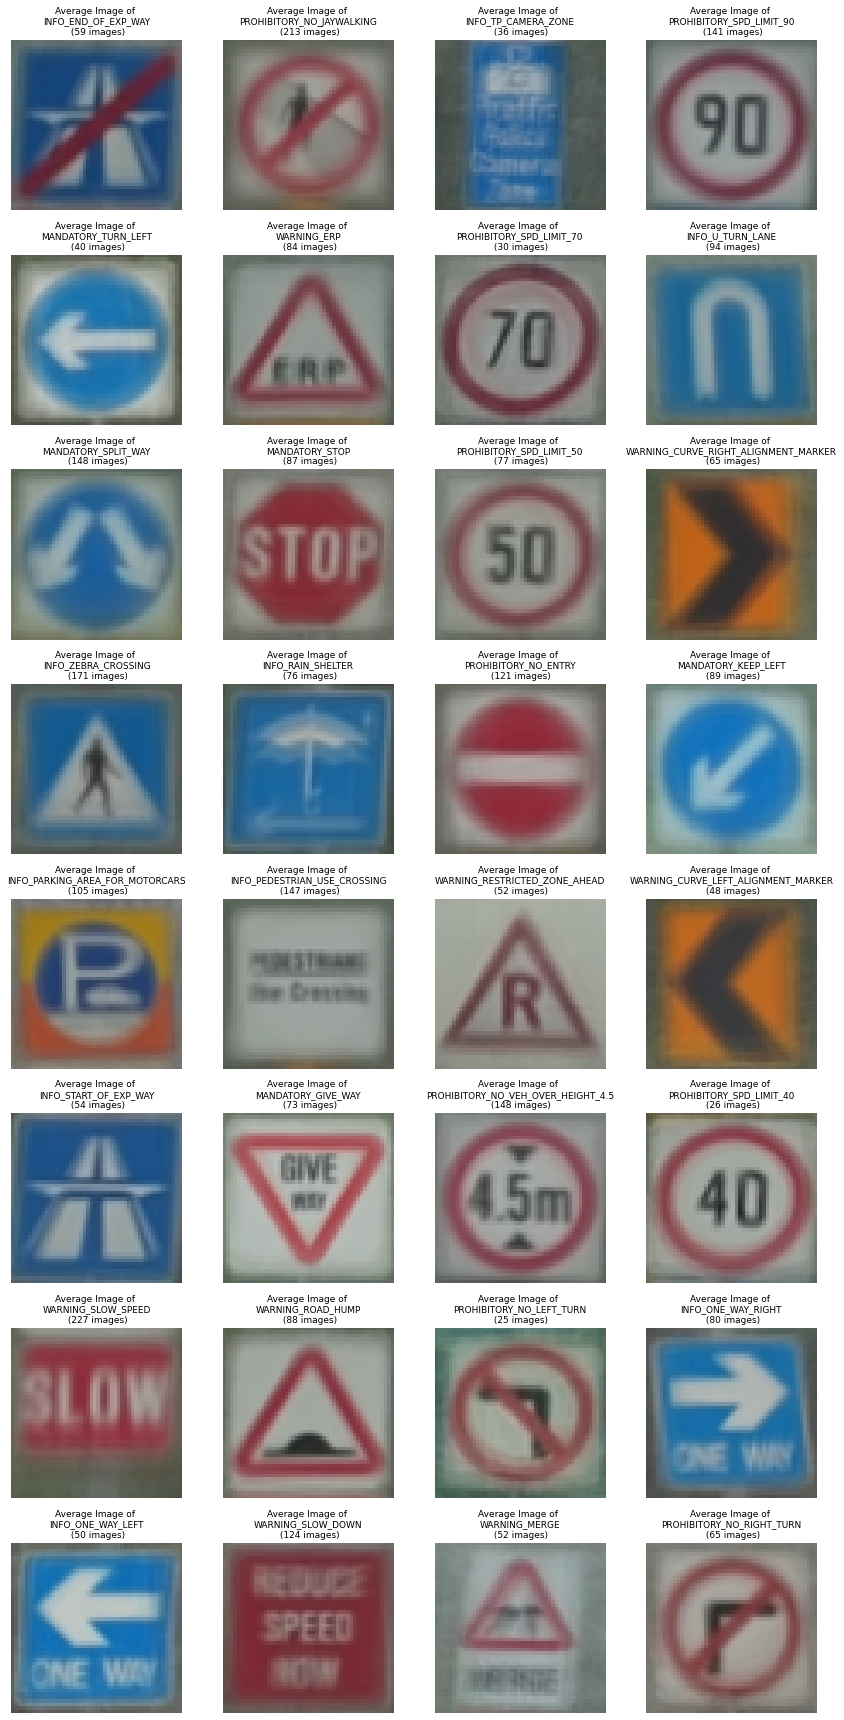

In [25]:
ncols = 4
nrows = 8

fig = plt.gcf()
fig.set_size_inches(ncols * 3, nrows * 3)

for i, traffic_sign_name in enumerate(label_manifest.loc[:,'DESCRIPTION']):
    targeted_traffic_signs = traffic_signs_df.loc[traffic_signs_df.loc[:,'description']==traffic_sign_name,:]
    filtered_train_arr = train_arr[targeted_traffic_signs.loc[:,'img_index']]
    avg_img, img_count = generate_average_image(filtered_train_arr)
    sp = plt.subplot(nrows, ncols, i+1)
    sp.axis('Off')
    plt.imshow(avg_img)
    plt.title('Average Image of \n{}\n ({} images)'.format(traffic_sign_name, img_count), fontsize=9)

plt.tight_layout()
plt.show()

Above plots revealed that averaging of images still yield discernable traffic signs. While they can still be easily differentiated, a few of them with smaller details are no longer reconizable. Traffic signs such as *INFO_TP_CAMERA_ZONE* and *INFO_PEDESTRIAN_USE_CROSSING* and *WARNING MERGE* have words that are no longer readable. The umbrella shape in *INFO_RAIN_SHELTER* traffic sign is no longer well-defined, perhaps due to different models of the sign that have umbrella shapes of different proportions.

## Data Pre-processing

### Load test dataset

In [26]:
ts_test_img_list, ts_test_label_list, test_traffic_signs_df = load_dataset(test_dir)
test_arr = np.array(ts_test_img_list)
test_label_arr = np.array(ts_test_label_list)

print('\nTotal number of images in train dataset: {}'.format(len(test_arr)))
print('Total number of labels for train dataset: {}'.format(len(test_label_arr)))

10 images found for label [0]: INFO_END_OF_EXP_WAY
11 images found for label [1]: PROHIBITORY_NO_JAYWALKING
13 images found for label [10]: PROHIBITORY_SPD_LIMIT_50
12 images found for label [11]: WARNING_CURVE_RIGHT_ALIGNMENT_MARKER
13 images found for label [12]: INFO_ZEBRA_CROSSING
10 images found for label [13]: INFO_RAIN_SHELTER
14 images found for label [14]: PROHIBITORY_NO_ENTRY
12 images found for label [15]: MANDATORY_KEEP_LEFT
11 images found for label [16]: INFO_PARKING_AREA_FOR_MOTORCARS
12 images found for label [17]: INFO_PEDESTRIAN_USE_CROSSING
10 images found for label [18]: WARNING_RESTRICTED_ZONE_AHEAD
10 images found for label [19]: WARNING_CURVE_LEFT_ALIGNMENT_MARKER
8 images found for label [2]: INFO_TP_CAMERA_ZONE
11 images found for label [20]: INFO_START_OF_EXP_WAY
11 images found for label [21]: MANDATORY_GIVE_WAY
13 images found for label [22]: PROHIBITORY_NO_VEH_OVER_HEIGHT_4.5
7 images found for label [23]: PROHIBITORY_SPD_LIMIT_40
13 images found for label 

### Inspect test dataset

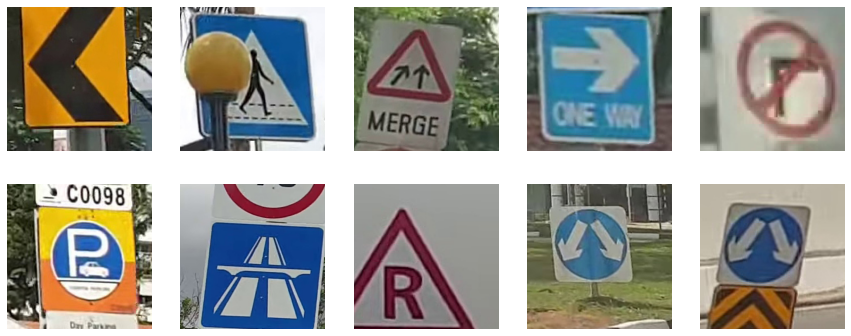

In [27]:
sample_test_traffic_signs = test_traffic_signs_df.sample(n=10)

ncols = 5
nrows = 2

fig = plt.gcf()
fig.set_size_inches(ncols * 3, nrows * 3)

for i, traffic_sign_index in enumerate(sample_test_traffic_signs.loc[:,'img_index']):
    sp = plt.subplot(nrows, ncols, i+1)
    sp.axis('Off')
    plt.imshow(test_arr[traffic_sign_index])
    
plt.show()

The test dataset would provide a means to objectively evaluate the performance of the trained model. As it contains traffic signs with more background noise and other artifacts (.e.g cropped at a side), the evaluation would most likely yield an accuracy rating that is lower than the train and validation accuracy scores, though the extent of the gap in scores would give an indication of the model's ability to generalise.

### Import all necessary libraries

In [3]:
import time
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

In [4]:
device_type = 'GPU'
physical_devices = tf.config.list_physical_devices(device_type) 
if physical_devices is not None:
    if len(physical_devices) > 0:
        print('Number of physical devices found: {}'.format(len(physical_devices)))
        print('Setting memory growth for 1st physical device: {}'.format(physical_devices[0].name))
        tf.config.experimental.set_memory_growth(physical_devices[0], True)
    else:
        print('No physical device of type [{}] found'.format(device_type))
else:
    print('No physical device of type [{}] found'.format(device_type))

Number of physical devices found: 1
Setting memory growth for 1st physical device: /physical_device:GPU:0


### Define training parameters

In [5]:
target_size = (50, 50) # image height, image width
model_batch_size = 128

### Define an ImageDataGenerator for data ingestion and augmentation of `train` dataset

The *ImageDataGenerator* class provides a convenient means to specify the different types of augmentations to be performed on images. Earlier EDA phase revealed that the images in train dataset exhibit various forms of variance, such as shearing due to perspective distortion, size variations due to proximity, and rotation due to physical orientation of the traffic sign and/or dash-cam position. As such, we can extend such augmentations to the dataset, so as to enhance the variance of inputs used to train the model.

In [6]:
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   shear_range=0.25,
                                   zoom_range=0.25,
                                   rotation_range=0.1,
                                   #brightness_range=[0.0, 0.2],
                                   fill_mode='nearest',
                                   horizontal_flip=False,
                                   vertical_flip=False,
                                   validation_split=0.33) # set validation split

### Ingest training data

After initialising the ImageDataGenerator with a set of augmentations, we use the flow_from_directory to ingest the images, further indicating other training-centric parameters such as intended dimensions (internal resizing mechanism), batch size, class mode, as well as data subset.

In [7]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=target_size,
                                                    batch_size=model_batch_size,
                                                    class_mode='categorical',
                                                    subset='training',
                                                    seed=42)  # set as training data

Found 1956 images belonging to 32 classes.


### Ingest validation data

The same ImageDataGenerator is used for ingesting the validation images.

In [8]:
validation_generator = train_datagen.flow_from_directory(train_dir, # same directory as training data
                                                         target_size=target_size,
                                                         batch_size=model_batch_size,
                                                         class_mode='categorical',
                                                         subset='validation',
                                                         seed=42) # set as validation data

Found 939 images belonging to 32 classes.


### Define an ImageDataGenerator for data ingestion and augmentation of `test` dataset

Another ImageDataGenerator is instantiated for handling test data. This time, no augmentations are to be performed on test images, i.e. they are used 'as it is' for objective evaluation of the model's performance, thus making enhancements unnecessary.

In [9]:
test_datagen = ImageDataGenerator(rescale=1./255)

### Ingest test data

Test images are then ingested with the 2nd ImageDataGenerator as described above.

In [10]:
def build_test_generator(datagen):
    test_gen = test_datagen.flow_from_directory(test_dir, 
                                                  target_size=target_size,
                                                  batch_size=1,
                                                  class_mode='categorical',
                                                  shuffle=False)
    return test_gen

test_generator = build_test_generator(test_datagen)

Found 352 images belonging to 32 classes.


## Model construction and evaluation

Image classification is the task of identifying images and categorizing them in one of several predefined distinct classes. 

In some ways similar to predicting property prices via a linear regression of housing data, or using Valence Aware Dictionary for Sentiment Reasoning (VADER) for sentiment analysis on a corpus of forum posts, the chosen model typically relies on an extracted set of features to that would exhibit a pattern and aid the prediction outcome. This is termed as feature engineering, a phase in which we derive a focused set of features from initial analysis, before feeding them into a model for training.

However, if we were to attempt such conventional feature engineering for image classification of traffic signs, that would require the gathering of characteristics of close to a hundred (or even thousands) of such signs that could occur in a given geographical boundary. It would be impossible to construct features that work for very possible image, and even more so when we consider other factors such as variability of perspectives, ligthing conditions, background noise and distortions. If these factors sound familiar, it is only because their variances were explored in the earlier section! 

Hence, there arise a need to utilise neural networks, a kind of deep learning model that would ingest the images and learn the features in them with the guidance from accompanying labels. In this section, we will explore the construction of a predictive model, using the Keras framework that is built on top of the Tensorflow platform, to classify a given traffic sign one of the 32 classes in the given domain.

### Define 1st model, `model_1`

For our 1st model, we define a basic neural network as follows:

<img src='./Images/model_1.h5.png' />

As shown above, the input layer takes a 50x50pixel RGB image and passes it immediately into a convolutional-2D layer of 32 filters as a baseline start to feature extraction for the 32 classes. It is followed by a flatten function that is fully connected to the a 32-unit Dense layer on rectified linear activation function (ReLU), then leading to the final output Dense layer of 32 units on softmax activation. The number of units of the output layer would always correspond to the number of possible categorical outcomes, which refer to the 32 classes available.

In [11]:
model_1 = Sequential([
    # 1st convo
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(50, 50, 3), name='Conv2D_1_32filter'),
    # flatten output to feed into a DNN
    Flatten(name='flatten_1'),
    # hidden layer
    Dense(units=32, activation='relu', name='Dense_1_32unit_ReLU'),
    # output layer, where number of neurons is equal to number of classes expected, 
    # and softmax activation for categorical classification
    Dense(units=32, activation='softmax', name='Dense_2_32unit_softmax')
], name='model_1')

model_1.compile(loss='categorical_crossentropy',
                optimizer='rmsprop',
                metrics=['accuracy'])

In [12]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv2D_1_32filter (Conv2D)   (None, 48, 48, 32)        896       
_________________________________________________________________
flatten_1 (Flatten)          (None, 73728)             0         
_________________________________________________________________
Dense_1_32unit_ReLU (Dense)  (None, 32)                2359328   
_________________________________________________________________
Dense_2_32unit_softmax (Dens (None, 32)                1056      
Total params: 2,361,280
Trainable params: 2,361,280
Non-trainable params: 0
_________________________________________________________________


What was seemingly a simple model, already contains over 2.3 million trainable neuron units, the majority of which sits in the hidden Dense layer of 32 units that is receiving flattened inputs in a fully connected manner. We now proceed with training `model_1`.

### Train `model_1`

In [38]:
start = time.time()
model_1_history = model_1.fit(train_generator,
                              epochs=50,
                              validation_data=validation_generator,
                              verbose=1)
end = time.time()
print('Total training time: {}s'.format(end-start))

Epoch 1/50
16/16 [==============================] - 5s 296ms/step - loss: 5.0135 - accuracy: 0.0905 - val_loss: 3.0042 - val_accuracy: 0.1076
Epoch 2/50
16/16 [==============================] - 5s 300ms/step - loss: 2.5955 - accuracy: 0.2975 - val_loss: 2.4083 - val_accuracy: 0.2780
Epoch 3/50
16/16 [==============================] - 5s 300ms/step - loss: 2.0554 - accuracy: 0.4479 - val_loss: 1.7515 - val_accuracy: 0.5783
Epoch 4/50
16/16 [==============================] - 5s 303ms/step - loss: 1.5149 - accuracy: 0.6314 - val_loss: 1.4835 - val_accuracy: 0.6358
Epoch 5/50
16/16 [==============================] - 5s 302ms/step - loss: 1.1564 - accuracy: 0.7249 - val_loss: 1.2286 - val_accuracy: 0.6858
Epoch 6/50
16/16 [==============================] - 5s 284ms/step - loss: 0.9062 - accuracy: 0.7791 - val_loss: 1.4259 - val_accuracy: 0.6177
Epoch 7/50
16/16 [==============================] - 4s 274ms/step - loss: 0.7077 - accuracy: 0.8241 - val_loss: 0.7670 - val_accuracy: 0.8190
Epoch 

### Define helper functions for model evaluation

In [136]:
def plot_training_and_val_metrics(history, model, metric, train_color, val_colur):
    train_metric = history.history[metric]
    val_metric = history.history['val_{}'.format(metric)]
    
    # Set figure size
    plt.figure(figsize=(10, 6))
    
    plt.title('[{}] Training and Validation {} by Epoch'.format(model.name, str.capitalize(metric)), fontsize = 15)
    
    plt.plot(train_metric, label='Training {}'.format(str.capitalize(metric)), color=train_color) # '#185fad'
    plt.plot(val_metric, label='Validation {}'.format(str.capitalize(metric)), color=val_colur) # 'orange'
    
    plt.xlabel('Epoch', fontsize = 12)
    plt.ylabel('Categorical Crossentropy', fontsize = 12)
    
    plt.legend(fontsize = 12)
    plt.show()
    
def evaluate_model_with_validation_and_test_datasets(model):
    print('Evaluation of {}:\n'.format(model.name))
    train_result = model.evaluate(train_generator, verbose=0)
    print('     Train accuracy: {}%'.format(round(train_result[1]*100, 1)))
    
    validation_result = model.evaluate(validation_generator, verbose=0)
    print('Validation accuracy: {}%'.format(round(validation_result[1]*100, 1)))
    
    test_result = model.evaluate(test_generator, verbose=0)
    print('      Test accuracy: {}%'.format(round(test_result[1]*100, 1)))

### Evaluate `model_1` performance

#### Plot the training & validation loss progression of `model_1`

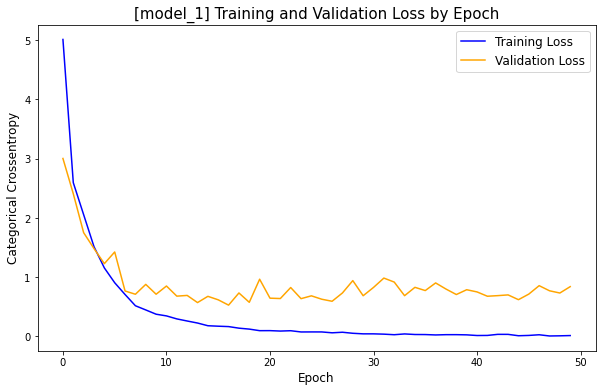

In [137]:
plot_training_and_val_metrics(model_1_history, model_1, 'loss', 'blue', 'orange')

Training loss was minimised to nearly 0, while validation loss remained around 0.8 to 1.0 after the 25th epoch onwards.

#### Plot the training & validation accuracy progression of `model_1`

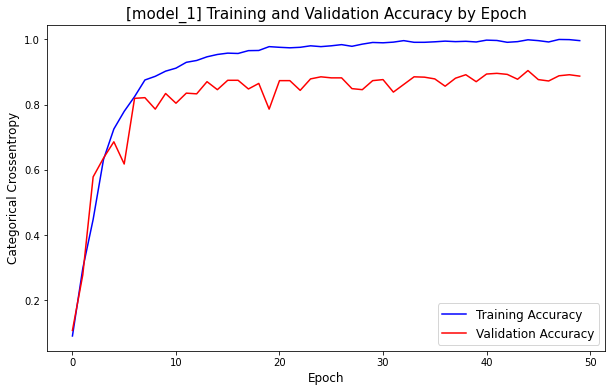

In [138]:
plot_training_and_val_metrics(model_1_history, model_1, 'accuracy', 'blue', 'red')

Training accuracy score of 99% was attained as early as the 30th epoch, however the validation accuracy improved to about 85% around 35th epoch onwards, stayed around that level and never caught up with training accuracy. In fact, validation accuracy could not keep pace with training accuracy from the 8th epoch onwards, giving slight indication the model hit a limit on its ability to learn the underlying patterns that are required to differentiate between the traffic signs.

#### Compute accuracy scores across train, validation and test datasets for `model_1`

In [139]:
evaluate_model_with_validation_and_test_datasets(model_1)

Evaluation of model_1:

     Train accuracy: 99.6%
Validation accuracy: 88.0%
      Test accuracy: 60.8%


Evaluation on test data further confirmed `model_1`'s inability to cope with unseen data, as given by the accuracy score of 60.8%, leaving a significant gap of at least 27 percentage-point difference from its validation score. There are 2 possible reasons for explaining the gap between test and validation scores. 

One possibility is the model's inability to generalise to unseen data, due to memorisation of training data. This is usually a sign of overfitting as we stipulate excessive epoch counts during training. However, an indicator of overfitting would be validation loss climbing after a certain number of epochs due to memorisation of training data, a sign that is not observed in the train/validation loss plot.

The other possibility would be the insufficient network size, where the single convolution layer and 1 hidden dense layer was not expressive enough to learn the patterns for telling the 32 classes apart. We can work from this angle and attempt to build a larger network in the next section.

### Define 2nd model, `model_2`

We define our 2nd model as follows:

<img src='./Images/model_2.h5.png?0' />

The 2nd model, `model_2`, accepts a 50x50pixel RGB image as input and passes it to a convolutional-2D layer of 16 filters (half of that in `model_1`) for initial feature extraction. This is followed by a max-pooling layer for downsampling of the feature map that comes out of the prior convolutional layer, so as to mitigate the inherent sensitivity of a feature map to the location of targeted features in an image. This is followed by 3 more other convolution/max-pooling layer pairs, performing more feature extraction and downsampling as we go deeper into the network.

After the last convolutional/max-pooling layer pair, the outputs are all flattened, then passed through a successive series of 4 other dense/dropout layer-pairs. The stack of 4 dense layers provide a means to increase the capacity of the network, an aspect that was lacking in the previous `model_1`. With a deeper network, the model can better learn out to tell apart the 32 different classes, a capability that resembles a highly non-linear mapping function. Of course, a network of such depth would make it prone to memorising the training data, hence the dropout layers are introduced to serve as an effective regularization method for mitigating such overfitting effects. This would help close the gap between validation and test accuracy, i.e. helping the model to generalise better.

The final layer is the same dense layer of 32 units on softmax activation.

In [164]:
model_2 = Sequential([
    # 1st convo
    Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(50, 50, 3), name='Conv2D_1_16filter_relu'),
    MaxPooling2D(pool_size=(2, 2), name='MaxPooling2D_1_2_2'),
    # 2nd convo
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', name='Conv2D_2_128filter_relu'),
    MaxPooling2D(pool_size=(2, 2), name='MaxPooling2D_3_2_2'),
    # 3rd convo
    Conv2D(filters=256, kernel_size=(3, 3), activation='relu', name='Conv2D_3_256filter_relu'),
    MaxPooling2D(pool_size=(2, 2), name='MaxPooling2D_4_2_2'),
    # 4th convo
    Conv2D(filters=256, kernel_size=(3, 3), activation='relu', name='Conv2D_4_256filter_relu'),
    MaxPooling2D(pool_size=(2, 2)),
    # flatten output to feed into a DNN
    Flatten(name='Flatten_1'),
    # dense layer 1
    Dense(units=512, activation='relu', name='Dense_1_512unit_relu'),
    # accompanying dropout
    Dropout(rate=0.5, name='Dropout_1_point5'), #0.5
    # dense layer 2
    Dense(units=256, activation='relu', name='Dense_2_256unit_relu'),
    # accompanying dropout
    Dropout(rate=0.5, name='Dropout_2_point5'), #0.5
    # dense layer 3
    Dense(units=128, activation='relu', name='Dense_3_128unit_relu'),
    # accompanying dropout
    Dropout(rate=0.5, name='Dropout_3_point5'), #0.5
    # output dense layer with softmax activation for categorical classification
    Dense(units=32, activation='softmax', name='Dense_4_32unit_softmax')
], name='model_2')

model_2.compile(loss='categorical_crossentropy',
                optimizer='rmsprop',
                metrics=['accuracy'])

In [165]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv2D_1_16filter_relu (Conv (None, 48, 48, 16)        448       
_________________________________________________________________
MaxPooling2D_1_2_2 (MaxPooli (None, 24, 24, 16)        0         
_________________________________________________________________
Conv2D_2_128filter_relu (Con (None, 22, 22, 128)       18560     
_________________________________________________________________
MaxPooling2D_3_2_2 (MaxPooli (None, 11, 11, 128)       0         
_________________________________________________________________
Conv2D_3_256filter_relu (Con (None, 9, 9, 256)         295168    
_________________________________________________________________
MaxPooling2D_4_2_2 (MaxPooli (None, 4, 4, 256)         0         
_________________________________________________________________
Conv2D_4_256filter_relu (Con (None, 2, 2, 256)         5900

Despite the greater depth of this 2nd model, the total number of parameters in `model_2` is nearly half that of the 1st model (>2.3M parameters), owing to the downsampling action of the max-pooling layers.

In [166]:
#model_2.save('./model_2.h5')

### Define an Early-Stop criteria

Early-stop callback would allow us to avoid excessive training once a specified criteria has been met, so as to mitigate the effects of overfitting, especially with `model_2` being a larger model. Criteria-wise, we would stop the training process after training loss has ceased to make any improvements after 5 epochs.

In [167]:
early_stop_callback = EarlyStopping(monitor='loss', patience=5)

### Train `model_2`

In [168]:
start = time.time()
model_2_history = model_2.fit(train_generator,
                              epochs=50,
                              validation_data=validation_generator,
                              callbacks=[early_stop_callback],
                              verbose=1)
end = time.time()
print('Total training time: {}s'.format(end-start))

Epoch 1/50
16/16 [==============================] - 5s 289ms/step - loss: 3.4327 - accuracy: 0.0516 - val_loss: 3.3536 - val_accuracy: 0.0788
Epoch 2/50
16/16 [==============================] - 4s 270ms/step - loss: 3.3622 - accuracy: 0.0706 - val_loss: 3.2137 - val_accuracy: 0.0788
Epoch 3/50
16/16 [==============================] - 5s 282ms/step - loss: 3.2144 - accuracy: 0.1058 - val_loss: 2.8957 - val_accuracy: 0.1768
Epoch 4/50
16/16 [==============================] - 4s 268ms/step - loss: 3.0417 - accuracy: 0.1626 - val_loss: 2.8641 - val_accuracy: 0.2130
Epoch 5/50
16/16 [==============================] - 4s 273ms/step - loss: 2.8025 - accuracy: 0.2260 - val_loss: 2.4317 - val_accuracy: 0.3163
Epoch 6/50
16/16 [==============================] - 4s 275ms/step - loss: 2.5148 - accuracy: 0.2751 - val_loss: 2.0987 - val_accuracy: 0.3866
Epoch 7/50
16/16 [==============================] - 4s 269ms/step - loss: 2.2999 - accuracy: 0.3318 - val_loss: 2.1437 - val_accuracy: 0.3791
Epoch 

### Evaluate `model_2` performance

#### Plot the training & validation loss progression of `model_2`

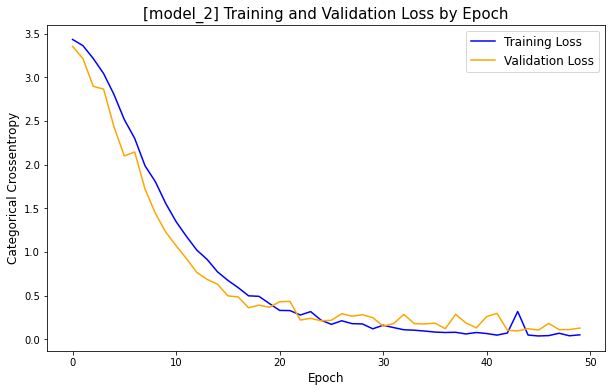

In [169]:
plot_training_and_val_metrics(model_2_history, model_2, 'loss', 'blue', 'orange')

Both training and validation loss reached nearly 0 at the end of the training process. More importantly, validation loss was able to keep pace with training loss.

#### Plot the training & validation accuracy progression of `model_2`

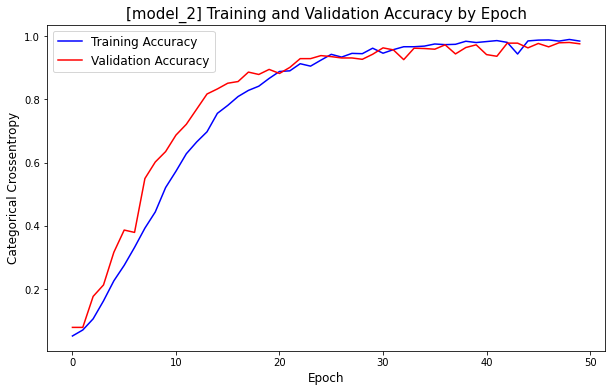

In [170]:
plot_training_and_val_metrics(model_2_history, model_2, 'accuracy', 'blue', 'red')

Traing accuracy came to 98%, while validation accuracy was 97%. Again, validation accuracy was able to keep pace with the training accuracy throughout the training process, unlike that for `model_1` where validation accuracy plateaued at a lower level than training accuracy.

#### Compute accuracy scores across train, validation and test datasets for `model_2`

In [171]:
evaluate_model_with_validation_and_test_datasets(model_2)

Evaluation of model_2:

     Train accuracy: 99.9%
Validation accuracy: 97.3%
      Test accuracy: 90.6%


Evaluation of performance of `model_2` revealed a test accuracy of 90.6%. While this was 30% better than `model_1`, the greater achievement of this model was the much smaller gap between test and validation scores, indicating that it is able to generalize to unseen data to a much better extent, compared to `model_1`.

### Save `model_2`

In [175]:
#model_2.save('./classification_model/')

INFO:tensorflow:Assets written to: ./classification_model/assets


In [176]:
test_loaded_model = tf.keras.models.load_model('./classification_model/')
evaluate_model_with_validation_and_test_datasets(test_loaded_model)

Evaluation of model_2:

     Train accuracy: 99.9%
Validation accuracy: 97.4%
      Test accuracy: 90.6%


### Visualising intermediate representations of traffic signs in `model_2`

In [28]:
# h5 is an empty model meant for visualisation, DO NOT PREDICT ON THIS ONE.
#model_2 = tf.keras.models.load_model('./Models/Classification/model_2.h5')

# saved_model package not work, USE KERAS PACKAGE TO LOAD BACK THE KERAS MODEL
#adhoc_model_2 = tf.saved_model.load('./Models/Classification/classification_model/')

model_2 = None
adhoc_model_2 = tf.keras.models.load_model('./Models/Classification/classification_model/')

#### Get list of images from test_datagen

In [29]:
test_datagen_image_list = []

test_generator = build_test_generator(test_datagen)
num_pics_in_test_datagen = len(test_generator.classes)
test_datagen_img = test_generator.next()

while len(test_datagen_image_list) < num_pics_in_test_datagen:
    test_datagen_image_list.append(test_datagen_img[0])
    test_datagen_img = test_generator.next()
    
print(len(test_datagen_image_list))

Found 352 images belonging to 32 classes.
352


#### Get predictions on test dataset

In [30]:
test_generator = build_test_generator(test_datagen)
#predictions = model_2.predict_classes(test_generator)
predictions = adhoc_model_2.predict_classes(test_generator)

class_index_to_traffic_sign_dict = {v: label_manifest.loc[k,'DESCRIPTION'] for k,v in test_generator.class_indices.items()}

test_gen_label_description_list = [class_index_to_traffic_sign_dict[k] for k in sorted(class_index_to_traffic_sign_dict.keys())]

test_result_df = pd.DataFrame({'label': test_generator.classes, 'prediction':predictions})
test_result_df.loc[:,'img_index'] = test_result_df.index
test_result_df = test_result_df.loc[:,['img_index','label','prediction']]
test_result_df.loc[:,'label'] = test_result_df.loc[:,'label'].apply(lambda x: class_index_to_traffic_sign_dict[x])
test_result_df.loc[:,'prediction'] = test_result_df.loc[:,'prediction'].apply(lambda x: class_index_to_traffic_sign_dict[x])
test_result_df.head()

Found 352 images belonging to 32 classes.


,img_index,label,prediction
0,0,INFO_END_OF_EXP_WAY,INFO_START_OF_EXP_WAY
1,1,INFO_END_OF_EXP_WAY,INFO_END_OF_EXP_WAY
2,2,INFO_END_OF_EXP_WAY,INFO_END_OF_EXP_WAY
3,3,INFO_END_OF_EXP_WAY,INFO_END_OF_EXP_WAY
4,4,INFO_END_OF_EXP_WAY,INFO_END_OF_EXP_WAY


#### Define helper function to make prediction and print probabilities

In [72]:
def generate_prediction_details(adhoc_image_index):
    #f, (a0, a1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1, 3]})
    a = plt.imshow(test_datagen_image_list[adhoc_image_index][0])
    #a0.imshow(test_datagen_image_list[adhoc_image_index][0], )
    print('Image index: {}'.format(adhoc_image_index))
    print('      Label: {}'.format(test_result_df.loc[test_result_df.loc[:,'img_index']==adhoc_image_index, 'label'].values[0]))
    print(' Prediction: {}'.format(test_result_df.loc[test_result_df.loc[:,'img_index']==adhoc_image_index, 'prediction'].values[0]))

    #adhoc_prediction = model_2.predict(test_datagen_image_list[adhoc_image_index])
    adhoc_prediction = adhoc_model_2.predict(test_datagen_image_list[adhoc_image_index])
    #print(adhoc_prediction[0])

    adhoc_prediction_proba_df = pd.DataFrame({'label': test_gen_label_description_list, 'pred_proba': adhoc_prediction[0]})

    plt.figure(figsize=(8, 8))
    plt.title('Prediction Probabilities by Traffic Sign Class', fontsize=20)
    sns.barplot(data=adhoc_prediction_proba_df, x='pred_proba', y='label')
    plt.ylabel('')
    plt.tick_params(axis='y', which='major', labelsize=8)
    plt.xlabel('Prediction Probability')
    plt.show()

#### Extract incorrect predictions

In [37]:
incorrect_predictions_df = test_result_df.loc[test_result_df.loc[:,'label'] != test_result_df.loc[:,'prediction'],:]
incorrect_predictions_df.sample(10)

,img_index,label,prediction
231,231,INFO_ONE_WAY_LEFT,INFO_ONE_WAY_RIGHT
206,206,WARNING_ROAD_HUMP,WARNING_ERP
7,7,INFO_END_OF_EXP_WAY,INFO_TP_CAMERA_ZONE
263,263,WARNING_MERGE,INFO_ONE_WAY_RIGHT
298,298,WARNING_ERP,WARNING_MERGE
295,295,WARNING_ERP,WARNING_MERGE
315,315,INFO_U_TURN_LANE,INFO_PARKING_AREA_FOR_MOTORCARS
251,251,PROHIBITORY_SPD_LIMIT_90,INFO_ZEBRA_CROSSING
48,48,INFO_ZEBRA_CROSSING,INFO_START_OF_EXP_WAY
89,89,MANDATORY_KEEP_LEFT,INFO_PARKING_AREA_FOR_MOTORCARS


#### Extract correct predictions

In [38]:
correct_predictions_df = test_result_df.loc[test_result_df.loc[:,'label'] == test_result_df.loc[:,'prediction'],:]
correct_predictions_df.sample(10)

,img_index,label,prediction
15,15,PROHIBITORY_NO_JAYWALKING,PROHIBITORY_NO_JAYWALKING
35,35,WARNING_CURVE_RIGHT_ALIGNMENT_MARKER,WARNING_CURVE_RIGHT_ALIGNMENT_MARKER
53,53,INFO_ZEBRA_CROSSING,INFO_ZEBRA_CROSSING
223,223,INFO_ONE_WAY_RIGHT,INFO_ONE_WAY_RIGHT
80,80,PROHIBITORY_NO_ENTRY,PROHIBITORY_NO_ENTRY
126,126,WARNING_RESTRICTED_ZONE_AHEAD,WARNING_RESTRICTED_ZONE_AHEAD
31,31,PROHIBITORY_SPD_LIMIT_50,PROHIBITORY_SPD_LIMIT_50
32,32,PROHIBITORY_SPD_LIMIT_50,PROHIBITORY_SPD_LIMIT_50
19,19,PROHIBITORY_NO_JAYWALKING,PROHIBITORY_NO_JAYWALKING
309,309,PROHIBITORY_SPD_LIMIT_70,PROHIBITORY_SPD_LIMIT_70


In [39]:
# correct : 250, 153, 152
# incorrect: 
# 289 (keep left/turn left), 
# 299 (erp/merge), 
# 206 (road_hump/erp), 
# 298 (erp/merge), 
# 304 (70/90)
# 119 (restricted/erp)

#### Inspection of incorrect predictions

##### Misclassification between `MANDATORY_TURN_LEFT` AND `MANDATORY_KEEP_LEFT`

Image index: 289
      Label: MANDATORY_TURN_LEFT
 Prediction: MANDATORY_KEEP_LEFT


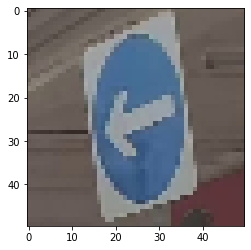

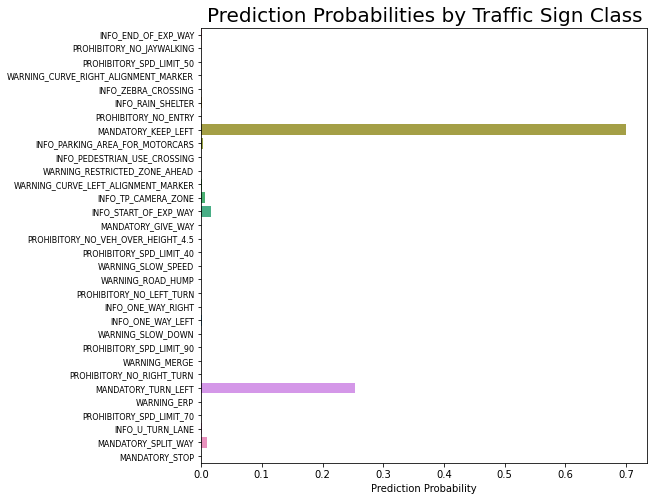

In [80]:
generate_prediction_details(incorrect_predictions_df.loc[289,'img_index'])

*MANDATORY_KEEP_LEFT* and *MANDATORY_TURN_LEFT* are information signs that have a slight difference: while *MANDATORY_TURN_LEFT* has arrow pointed horizontally to the left, *MANDATORY_KEEP_LEFT* has arrow pointing 45 degrees towards bottom-left direction. In this instance, the model was likely misled by the slight tilt of the test image to misclassify it as *MANDATORY_KEEP_LEFT*. This underscores the need to be very careful with data-augmentation options, where image rotation might cause a change in meaning of the affected class.

##### Misclassification between `WARNING_ERP` and `WARNING_MERGE`

Image index: 298
      Label: WARNING_ERP
 Prediction: WARNING_MERGE


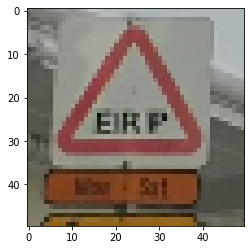

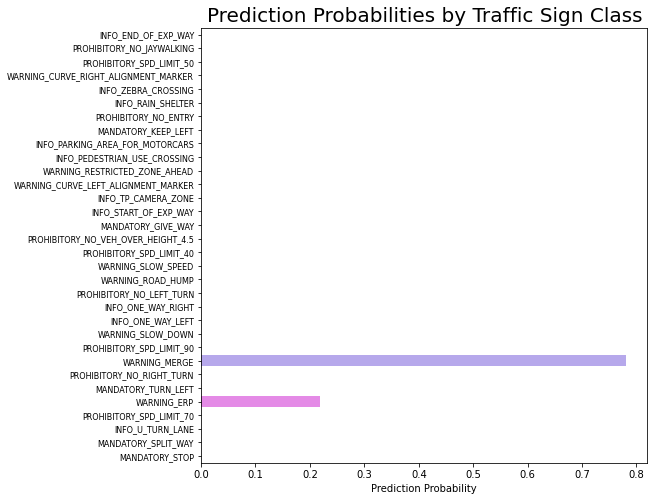

In [81]:
generate_prediction_details(incorrect_predictions_df.loc[298,'img_index'])

Image index: 299
      Label: WARNING_ERP
 Prediction: WARNING_MERGE


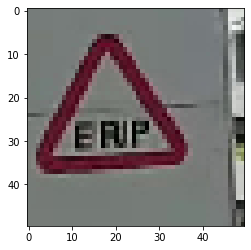

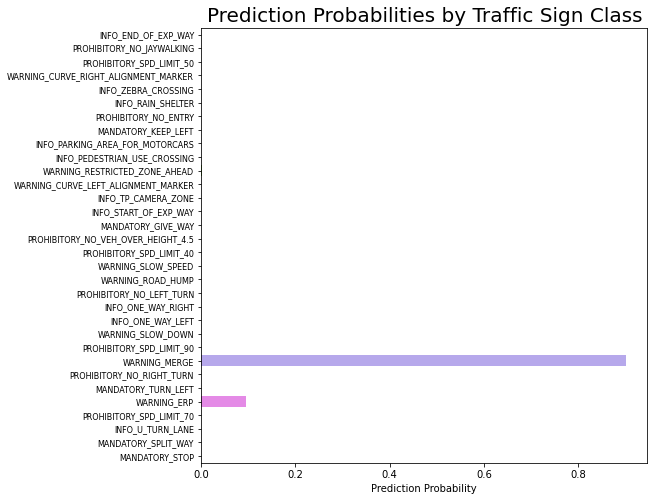

In [82]:
generate_prediction_details(incorrect_predictions_df.loc[299,'img_index'])

There were 2 instances of *WARNING ERP* signs being misclassified as *WARNING MERGE* signs. Inspection of the designs of both signs revealed that they have some similarities, such as the red triangle, as well as additional content within the triangle (2 black converging arrows for *WARNING MERGE*, and 'ERP' in *WARNING ERP*). 

The above probability distribution plots showed that the model did consider *WARNING ERP* to a small extent, which gives indication that the model have detected some similarities in both signs.

It might have been a case of insufficient training data for both signs that led to this misclassification, or perhaps a slightly deeper network might help with learnining the differences between these 2 signs.

##### Misclassification between *WARNING_RESTRICTED_ZONE_AHEAD* and *WARNING_MERGE*

Image index: 119
      Label: WARNING_RESTRICTED_ZONE_AHEAD
 Prediction: WARNING_MERGE


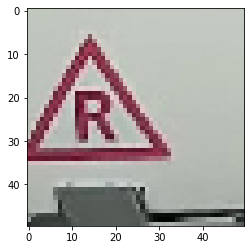

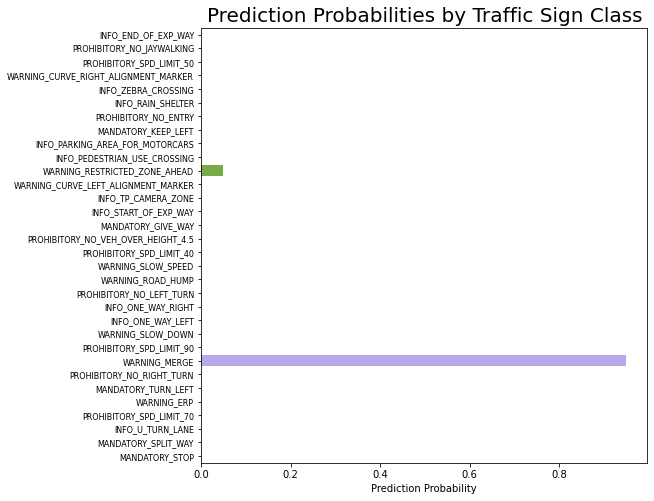

In [83]:
generate_prediction_details(incorrect_predictions_df.loc[119,'img_index'])

One of the test images with *WARNING RESTRICTED ZONE AHEAD* has also been misclassified as *WARNING MERGE*, which has given further indication that either training or network depth might not have been sufficient enough to produce a model that could reliably tell apart the different warning signs.

#### Define function to inspect the feature maps from *Conv2D_1_16filter_relu* layer

In [402]:
def inspect_first_convolution_output(adhoc_img_index):
    successive_outputs = [layer.output for layer in model_2.layers[1:3]]
    visualisation_model = tf.keras.models.Model(inputs = model_2.input, outputs = successive_outputs)
    
    successive_feature_maps = visualisation_model.predict(test_datagen_image_list[adhoc_img_index])
    
    plt.imshow(test_datagen_image_list[adhoc_img_index][0])

    for layer_name, feature_map in zip(layer_names, successive_feature_maps):
      if len(feature_map.shape) == 4:
        # Just do this for the conv / maxpool layers, not the fully-connected layers
        n_features = feature_map.shape[-1]  # num of features in feature map
        # feature map shape: (1, size, size, n_features)
        size = feature_map.shape[1]
        # init display_grid to hold tiled images
        display_grid = np.zeros((size, size * n_features))
        for i in range(n_features):
          # adjust feature pixels for clearer display
          x = feature_map[0, :, :, i]
          x -= x.mean()
          x /= x.std()
          x *= 64
          x += 128
          x = np.clip(x, 0, 255).astype('uint8')
          # tile each filter into a horizontal grid
          display_grid[:, i * size : (i + 1) * size] = x
        # display grid
        scale = 20. / n_features
        plt.figure(figsize=(scale * n_features, scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='inferno')

#### Inspect feature map of a selected image

<ipython-input-402-39061e949bdf>:21: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std()


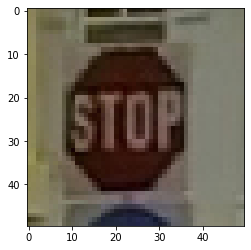

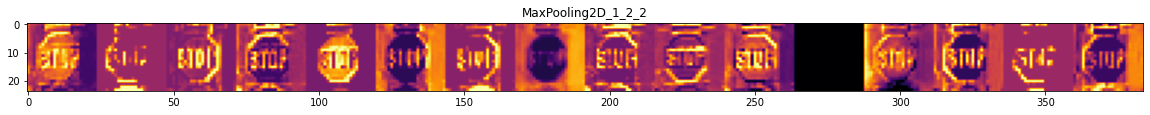

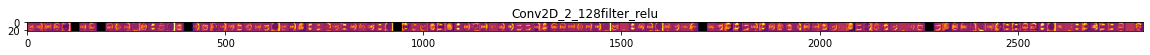

In [403]:
inspect_first_convolution_output(correct_predictions_df.sample(1).loc[:,'img_index'].values[0])

In [332]:
# red: #1, #5, #13 (strong)
# blue: #2, #7, #15
# white: #6, #8
# yellow: #1, #11, #13

## Conclusion

### Key takeways:


- For the traffic sign classification dataset, it had 2895 images, across 32 classes of traffic signs.


- Exploratory Data Analysis revealed a class imbalance, with *WARNING_SLOW_SPEED* as the largest class having 227 images, while *PROHIBITORY_NO_LEFT_TURN* is the small class with only has 26 images. While the images are all cropped into square format, there is a still a variance in width, with most images measuring around 120-140 pixels at each side. Mean brightness is slightly below average, owing to factors like exposure compensation in videos, as well as real-world conditions such as degree of shade or exposure to sunlight. Perspective variance arises from factors such as mounting of traffic signs, direction in which they are facing in relation to camera, and lens distortions in video capture device. Other variances include faded colours on signs, obstructed view by foreign objects, or simply dirt on signs. Colour cast due to video capture device, external weather elements like rain, and night-time street lamp illumination will also affect how traffic signs appear to viewers. Howver, despite all these variances, average-image analysis revealed that most traffic signs are still discernable from one another, with reasons including sign being mostly front and center in the image, and inherent design of signs being very distinguishable in the first place.


- In the pre-processing phase, we use the image data-generator features of Tensorflow to perform data augmentation, as well as train/validation split. A test set was introduced, containing traffic signs with off-centre position, more background clutter and other variances. This would serve as a stringent and impartial evaluation of the trained model, apart from the validation set that steers the minimising of the loss function during model training.


- 1st model was a basic convolutional neural network consisting of 1 Conv2D layer with 32 filters, connected to dense hidden layer of 32 units, then followed by output dense layer of 32 units to reflect the categorical classification of the 32 classes. Test accuracy was only60.8%, evening though training accuracy topped out at 99.6%, with validation accuracy at 88.0%. Validation loss and accuracy plots stabilised after around 10 epochs with no deterioration, suggesting that insufficient network capacity was more of an issue than overfitting.


- 2nd model was constructed with 4 Conv2D layers with accompanying max-pooling layers to down-sample the feature map outputs from respective convolutional layers. This is followed by 3 more hidden dense layers with accompanying dropout layers as a form of regularisation to mitigate overfitting tendencies of a deep network. Early stop criteria was set to monitor training loss for stagnant over 5 epoch, but was never triggered. This time, train accuracy was 99.9%, validation at 97.3%, and test accuracy at 90%. All 3 accuracy metrics are well within 10% deviation of each other, and progress of validation loss and accuracy optimisation were mostly keeping pace with the training progress throughout the 50 epochs.


- Inspection of incorrect predictions on test set revealed that model was misclassififed *MANDATORY_TURN_LEFT* sign as *MANDATORY_KEEP_LEFT* sign, owing to a slight tilt in the test image, as well as close similarities between both signs. This underscores the need to evaluate data augmentations carefully, and avoid using the options that might introduce ambiguity between classes. Misclassifications between *WARNING_MERGE* with *WARNING_ERP* and *WARNING_RESTRICTED_ZONE_AHEAD* indicate that the model might have insufficient training in differentiating between these warning signs, especially when the pre-dominant similarity is the red triangle on white background. Statatistics on class distribution indicate that all these 3 signs have under a hundred images, hence the lack of sufficient data might have affected the model's ability to fully learn the differences in their patterns.

### Recommendations:


- To consider including more training images of traffic signs that are not so tightly cropped. The current `train` dataset has a very high signal-to-noise ratio, and that may have inadvertently caused the model to be less confident with classifying images with more background clutter in the *test* set.


- To expand this classification dataset further, as Singapore has a total of more than 80 classes of traffic signs. A dataset that provides sufficient representation for all available classes would provide a better gauge in constructing a model that could accommodate the complete set of classes.


- To consider conducting transfer learning on an existing well-known models (e.g. ResNet50, VGG-16, etc) that have a proven track record in benchmarks such as the MS COCO dataset.